In [1]:
import pandas
import numpy
from matplotlib import pyplot as plt

In [2]:
grades = pandas.read_csv("CSE105_WI24_A00_Winter_2024_grades.csv",
    usecols=["First Name", "Last Name", "SID", "Email",
             "hw1CSE105W24","hw2CSE105W24","hw3CSE105W24","hw4CSE105W24","hw5CSE105W24","Project",
             "Test 1 ⭐️", "Test 1 🙂", "Test 1 ☀️",
             "Test 2 ⭐️", "Test 2 🙂", "Test 2 ☀️", "Final Part 1", "Final Part 2",
             "Week 1 Monday Review Quiz", "Week 1 Wednesday Review Quiz", "Week 1 Friday Review Quiz",
             "Week 2 Wednesday Review Quiz", "Week 2 Friday Review Quiz",
             "Week 3 Monday Review Quiz", "Week 3 Wednesday Review Quiz", "Week 3 Friday Review Quiz",
             "Week 4 Monday Review Quiz", "Week 4 Wednesday Review Quiz", "Week 4 Friday Review Quiz",
             "Week 5 Monday Review Quiz", "Week 5 Wednesday Review Quiz",
             "Week 6 Monday Review Quiz", "Week 6 Wednesday Review Quiz", "Week 6 Friday Review Quiz",
             "Week 7 Wednesday Review Quiz", "Week 7 Friday Review Quiz",
             "Week 8 Monday Review Quiz", "Week 8 Wednesday Review Quiz", "Week 8 Friday Review Quiz",
             "Week 9 Monday Review Quiz", "Week 9 Wednesday Review Quiz",
             "Week 10 Monday Review Quiz", "Week 10 Wednesday Review Quiz", "Week 10 Friday Review Quiz"]
)

grades = grades.rename(columns={'hw1CSE105W24': 'HW1',
                                'hw2CSE105W24': 'HW2',
                                'hw3CSE105W24': 'HW3',
                                'hw4CSE105W24': 'HW4',
                                'hw5CSE105W24': 'HW5',
                                'Final Part 1': 'Final1',
                                'Final Part 2': 'Final2'})


In [3]:
## Aggregate in-class test versions

grades["Inclass1"] = grades[["Test 1 ⭐️", "Test 1 🙂", "Test 1 ☀️"]].max(axis=1)
grades["Inclass2"] = grades[["Test 2 ⭐️", "Test 2 🙂", "Test 2 ☀️"]].max(axis=1)
grades

,First Name,Last Name,SID,Email,Week 5 Wednesday Review Quiz,HW5,HW2,HW1,Project,Week 8 Wednesday Review Quiz,...,Test 1 🙂,Test 1 ⭐️,Week 9 Monday Review Quiz,Test 2 ⭐️,Test 2 🙂,Test 2 ☀️,Final1,Final2,Inclass1,Inclass2
0,Aanya,Sharma,A16919660,aas008@ucsd.edu,NaN,44.0,38.0,40.0,84.0,10.0,...,NaN,37.0,10.0,NaN,34.0,NaN,45.0,46.0,37.0,34.0
1,Aaron,Arellano,A17376822,a3arellano@ucsd.edu,10.0,NaN,34.0,41.0,100.0,10.0,...,30.0,NaN,10.0,NaN,NaN,25.0,42.0,37.0,30.0,25.0
2,Aaron,Li,A17421222,all042@ucsd.edu,10.0,NaN,49.0,49.0,100.0,10.0,...,NaN,NaN,10.0,NaN,NaN,44.0,NaN,NaN,47.0,44.0
3,Aarush,Mehrotra,A17467883,amehrotra@ucsd.edu,10.0,33.0,37.0,48.0,83.0,10.0,...,NaN,NaN,NaN,25.0,NaN,NaN,32.0,22.0,NaN,25.0
4,Aaryan,Tiwary,A16201693,atiwary@ucsd.edu,10.0,NaN,48.0,49.0,96.0,10.0,...,NaN,NaN,10.0,NaN,NaN,36.0,NaN,NaN,44.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,Zhencheng,Lin,A17428906,zhl132@ucsd.edu,10.0,41.0,44.0,37.0,80.0,10.0,...,19.0,NaN,2.0,NaN,24.0,NaN,23.5,25.0,19.0,24.0
343,Zhiran,Xie,A16405311,z4xie@ucsd.edu,NaN,NaN,43.0,48.0,100.0,10.0,...,24.0,NaN,10.0,NaN,NaN,39.0,41.0,NaN,24.0,39.0
344,Zhiyu,Zhu,A17630579,zhz133@ucsd.edu,10.0,NaN,46.0,44.0,95.0,10.0,...,NaN,22.0,NaN,NaN,NaN,NaN,32.0,16.0,22.0,NaN
345,Zijie,Qiu,A17019385,ziqiu@ucsd.edu,10.0,NaN,42.0,46.0,94.0,10.0,...,NaN,NaN,10.0,NaN,25.0,NaN,38.0,27.5,26.0,25.0


In [4]:
## Letter grade for each component (see thresholds here https://docs.google.com/document/d/1qgJc5Yj_Sg6qDjpFel_km6m7nn8GgvZg05KvCDhfp6s/edit?pli=1)

thresholds ={ 
    'HW1': [0, 24.99,39.99,44.99,52],
    'HW2': [0, 24.99,33.99,42.99,52],
    'HW3': [0, 24.99,39.99,44.99,52],
    'HW4': [0, 24.99,37.99,42.99,52],
    'HW5': [0, 24.99,34.99,41.99,52],
    'Project': [0, 39.99,79.99,89.99,102],
    'Inclass1': [0, 19.99,29.99,42.99,52],
    'Inclass2': [0, 20.99,31.99,40.99,52],
    'Final1': [0, 19.99,31.99,41.99,52],
    'Final2': [0, 14.99,28.99,39.99,52]
}

#Rachel: Part 1 I'd say 44, maybe 43 (still looking at these) for A? 
#42/50 definitely seems like there's multiple conceptual errors. 
#Maybe 38 or 39 for B, since anything below that seems to show even more misunderstandings. 
#And for C, not sure maybe like somewhere 30-32?

#Xinsong: tentatively suggesting 40 for an A. 
# 29 for a B and 19 for a C. 
#This is accounting for people recovering say 2 partial credits on average from the fill in the blanks.

In [5]:
## Apply thresholds and relaxed thresholds (reduce by 1) to calculate grade point for each assessment

thresholdsRel = {k: [v - 1 for v in v_list] for k, v_list in thresholds.items()}
#thresholdsRel

for col in ['HW1','HW2','HW3','HW4','HW5','Project','Inclass1','Inclass2','Final1','Final2']:
    newcolname = col + 'grade'
    grades[newcolname] = pandas.cut(grades[col], bins = thresholds[col], right = False, labels = [0,2,3,4])
    grades[newcolname + 'Rel'] = pandas.cut(grades[col], bins = thresholdsRel[col], right = False, labels = [0,2,3,4])

## Fill missing scores with 0s and compute max of Test1, Test2 between in class and final exam portion
grades.fillna(0,inplace=True)
grades['Test1grade'] = numpy.nanmax(grades[['Inclass1grade','Final1grade']],axis=1)
grades['Test1gradeRel'] = numpy.nanmax(grades[['Inclass1gradeRel','Final1gradeRel']],axis=1)
grades['Test2grade'] = numpy.nanmax(grades[['Inclass2grade','Final2grade']],axis=1)
grades['Test2gradeRel'] = numpy.nanmax(grades[['Inclass2gradeRel','Final2gradeRel']],axis=1)

# AUDIT: does relaxing thresholds ever lower grade? Expected behavior: empty data frame
relaxedWorse = grades[['HW1grade','HW1gradeRel','HW2grade','HW2gradeRel','HW3grade','HW3gradeRel',
                       'HW4grade','HW4gradeRel','HW5grade','HW5gradeRel','Projectgrade','ProjectgradeRel',
                       'Inclass1','Inclass2','Final1','Final2']][
                           (grades['HW1grade']>grades['HW1gradeRel']) | 
                           (grades['HW2grade']>grades['HW2gradeRel']) | 
                           (grades['HW3grade']>grades['HW3gradeRel']) | 
                           (grades['HW4grade']>grades['HW4gradeRel']) | 
                           (grades['HW5grade']>grades['HW5gradeRel']) | 
                           (grades['Projectgrade']>grades['ProjectgradeRel']) | 
                           (grades['Inclass1grade']>grades['Inclass1gradeRel']) | 
                           (grades['Inclass2grade']>grades['Inclass2gradeRel']) | 
                           (grades['Final1grade']>grades['Final1gradeRel']) | 
                           (grades['Final2grade']>grades['Final2gradeRel']) ]
relaxedWorse

,HW1grade,HW1gradeRel,HW2grade,HW2gradeRel,HW3grade,HW3gradeRel,HW4grade,HW4gradeRel,HW5grade,HW5gradeRel,Projectgrade,ProjectgradeRel,Inclass1,Inclass2,Final1,Final2


In [6]:
## Count number of Review Quizzes with more than half credit

numQuizzes = len(grades[[col for col in grades.columns if "Quiz" in col]].columns)
grades['NumQuizzes'] = grades[[col for col in grades.columns if "Quiz" in col]].gt(5).sum(axis=1)
grades['MissingQuizzes'] = (grades['NumQuizzes'] - numQuizzes)*(-1)

print("Total quizzes available are " + str(numQuizzes))
#print("Statistics for number of quizzes students scored at least half credit on")
#print(grades['NumQuizzes'].describe())
#print("Statistics for number of missing quizzes for students")
#print(grades['MissingQuizzes'].describe())


Total quizzes available are 26


**From Syllabus**

*For Tests*

An **A** means
- A on both tests or A on one of the tests and B on the other

A **B** means
- B or higher on both tests **or** 
- A on one of the tests and C on the other

A **C** means
- C or higher on both tests

In [7]:
## Calculate overall grade point for test component

#Test 1 : 4 - 4 - 4 - 4 - 3 - 3 - 3 - 3 - 2 - 2 - 2 - 2 - 0 - 0 - 0 - 0
#Test 2 : 4 - 3 - 2 - 0 - 4 - 3 - 2 - 0 - 4 - 3 - 2 - 0 - 4 - 3 - 2 - 0
#Sum    : 8 - 7 - 6 - 4 - 7 - 6 - 5 - 3 - 6 - 5 - 4 - 2 - 4 - 3 - 2 - 0
#Grade  : 4 - 4 - 3 - 0 - 4 - 3 - 2 - 0 - 3 - 2 - 2 - 0 - 0 - 0 - 0 - 0
#If 0 in either then 0 
#Otherwise, >= 7 : 4
#== 6 : 3
#<6 : 2

def calcTestGrade(relaxedString) :
    grades['TestGrade'+relaxedString] = grades.apply(lambda row: 0     # Failing both tests means F Test grade
                            if ( (row['Test1grade'+relaxedString] == 0) | (row['Test2grade'+relaxedString] == 0))
                            else 4 # Combined test grade greater than or equal to 7 means one is 3 and the other 4 or both are 4
                            if ( (row['Test1grade'+relaxedString] + row['Test2grade'+relaxedString]) >=7 )
                            else 3 # Combined test grade 6 when both nonzero means either both 3 or one is 4 and the other is 2
                            if ( (row['Test1grade'+relaxedString] + row['Test2grade'+relaxedString]) ==6 ) 
                            else 2
                            if ( (row['Test1grade'+relaxedString] + row['Test2grade'+relaxedString]) <6 )
                            else 'err', axis=1)
# Create grade column for grades calculated with absolute thresholds
calcTestGrade("")
# Create grade column for grades calculated with relaxed thresholds
calcTestGrade("Rel")

# AUDIT: Any error values? Expected behavior: empty data frame
print (grades[['TestGrade','TestGradeRel']].loc[(grades['TestGrade'] == 'err') | (grades['TestGradeRel'] == 'err')])
# AUDIT: does relaxing thresholds ever lower grade? Expected behavior: empty data frame
relaxedTestWorse = grades[['Test1grade','Test1gradeRel','Test2grade','Test2gradeRel','TestGrade','TestGradeRel']][
                           (grades['Test1grade']>grades['Test1gradeRel']) | 
                           (grades['Test2grade']>grades['Test2gradeRel']) |
                           (grades['TestGrade']>grades['TestGradeRel'])]
relaxedWorse

Empty DataFrame
Columns: [TestGrade, TestGradeRel]
Index: []


,HW1grade,HW1gradeRel,HW2grade,HW2gradeRel,HW3grade,HW3gradeRel,HW4grade,HW4gradeRel,HW5grade,HW5gradeRel,Projectgrade,ProjectgradeRel,Inclass1,Inclass2,Final1,Final2


**From Syllabus**

*For Assignments* 

An **A** means
- A on at least 4 homeworks, B or above on project, any grade on rest of assignments **or**
- B or above on at least 4 homeworks, A on project, any grade on rest of assignments.

A **B** means
- B or above on at least 4 homeworks, C or above on project, any grade on rest of assignments, **or**
- C or above on at least 4 homeworks, B on project, any grade on rest of assignments.

A **C** means
- C or above on at least 3 homeworks and the project, any grade on rest of assignments.

In [8]:
## Calculate overall grade point for assignment component

grades['HW As'] = grades[['HW1grade','HW2grade','HW3grade','HW4grade','HW5grade']].apply(lambda row: len(row[row == 4.0]), axis=1)
grades['HW Bs'] = grades[['HW1grade','HW2grade','HW3grade','HW4grade','HW5grade']].apply(lambda row: len(row[row == 3.0]), axis=1)
grades['HW Cs'] = grades[['HW1grade','HW2grade','HW3grade','HW4grade','HW5grade']].apply(lambda row: len(row[row == 2.0]), axis=1)
grades['HW and Project at least Cs'] = grades[['HW1grade','HW2grade','HW3grade','HW4grade','HW5grade','Projectgrade']].apply(lambda row: len(row[row >= 2.0]), axis=1)
grades['HW Fs'] = grades[['HW1grade','HW2grade','HW3grade','HW4grade','HW5grade']].apply(lambda row: len(row[row == 0.0]), axis=1)

grades['HWGrade'] = grades.apply(lambda row: 4 #A on at least 4 homeworks and B or A or Project OR at least 4 HWs with A or B and A on Project
                            if ( ( (row['HW As'] >= 4) & (row['Projectgrade'] >= 3)) |  ((row['HW Bs']+row['HW As'] >= 4) & (row['Projectgrade'] == 4) ) ) 
                            else 3 #B or A on at least 4 HWs and C or better on Project OR C or B or A on at least 4 HWs and B or A on Project
                            if ( ( (row['HW Bs']+row['HW As'] >= 4) & (row['Projectgrade'] >= 2)) |  ((row['HW Cs']+row['HW Bs']+row['HW As'] >= 4) & (row['Projectgrade'] >=3) ) ) 
                            else 2 #C or above on at least three of the HWs and project
                            if (row['HW and Project at least Cs'] > 3)
                            else 0, axis=1)

grades['HW AsRel'] = grades[['HW1gradeRel','HW2gradeRel','HW3gradeRel','HW4gradeRel','HW5gradeRel']].apply(lambda row: len(row[row == 4.0]), axis=1)
grades['HW BsRel'] = grades[['HW1gradeRel','HW2gradeRel','HW3gradeRel','HW4gradeRel','HW5gradeRel']].apply(lambda row: len(row[row == 3.0]), axis=1)
grades['HW CsRel'] = grades[['HW1gradeRel','HW2gradeRel','HW3gradeRel','HW4gradeRel','HW5gradeRel']].apply(lambda row: len(row[row == 2.0]), axis=1)
grades['HW and Project at least CsRel'] = grades[['HW1gradeRel','HW2gradeRel','HW3gradeRel','HW4gradeRel','HW5gradeRel','ProjectgradeRel']].apply(lambda row: len(row[row >= 2.0]), axis=1)
grades['HW FsRel'] = grades[['HW1gradeRel','HW2gradeRel','HW3gradeRel','HW4gradeRel','HW5gradeRel']].apply(lambda row: len(row[row == 0.0]), axis=1)

grades['HWGradeRel'] = grades.apply(lambda row: 4 #A on at least 4 homeworks and B or A or Project OR at least 4 HWs with A or B and A on Project
                            if ( ( (row['HW AsRel'] >= 4) & (row['ProjectgradeRel'] >= 3)) |  ((row['HW BsRel']+row['HW AsRel'] >= 4) & (row['ProjectgradeRel'] == 4) ) ) 
                            else 3 #B or A on at least 4 HWs and C or better on Project OR C or B or A on at least 4 HWs and B or A on Project
                            if ( ( (row['HW BsRel']+row['HW AsRel'] >= 4) & (row['ProjectgradeRel'] >= 2)) |  ((row['HW CsRel']+row['HW BsRel']+row['HW AsRel'] >= 4) & (row['ProjectgradeRel'] >=3) ) ) 
                            else 2 #C or above on at least three of the HWs and project
                            if (row['HW and Project at least CsRel'] > 3)
                            else 0, axis=1)

# grades.apply(lambda row: row['HW As'] >= row['HW As Rel'], axis = 1)
# print(grades.loc[[1]][['HW1grade','HW2grade','HW3grade','HW4grade','HW5grade','HW As']])
# print(grades.loc[[1]][['HW1gradeRel','HW2gradeRel','HW3gradeRel','HW4gradeRel','HW5gradeRel','HW As Rel']])
# print(grades.loc[[1]][['Project', 'Projectgrade', 'ProjectgradeRel','HWGrade','HWGradeRel']])

# AUDIT: does relaxing thresholds ever lower grade? Expected behavior: empty data frame
relaxedAssignmentWorse = grades[['HW As','HW AsRel','HW Bs','HW BsRel','HW Cs','HW CsRel',
                            'HW and Project at least Cs','HW and Project at least CsRel', 'HW Fs','HW FsRel',
                            'HWGrade','HWGradeRel']][
                           (grades['HWGrade']>grades['HWGradeRel'])]
relaxedAssignmentWorse

,HW As,HW AsRel,HW Bs,HW BsRel,HW Cs,HW CsRel,HW and Project at least Cs,HW and Project at least CsRel,HW Fs,HW FsRel,HWGrade,HWGradeRel


In [9]:
## Calculate letter grades and add +/- modifiers. 
## For A level grades, need 0 missing quizzes to earn + and if earn credit for fewer than half of quizzes, get -
## For B level grades, need at most 6 missing quizzes to earn + and if earn credit for fewer than a quarter of quizzes, get -
## For C level grades, need at most 9 missing quizzes to earn + and if earn credit for fewer than a quarter of quizzes, get -
## For D level grade, need to earn credit for at least three quarters of the quizzes and pass at least one of project or HWs

# Function to calculate grades with argument to specify whether 
#using absolute thresholds (relaxedString="") or relaxed thresholds (relaxedString="Rel")
def calcGrade(relaxedString) :
    grades['Grade'+relaxedString] = grades.apply(lambda row: 4
                            if ( (row['TestGrade'+relaxedString] == 4) & (row['HWGrade'+relaxedString] == 4))
                            else 3
                            if ( (row['TestGrade'+relaxedString] >= 3) & (row['HWGrade'+relaxedString] >= 3)) 
                            else 2
                            if ( (row['TestGrade'+relaxedString] >= 2) & (row['HWGrade'+relaxedString] >=2))
                            else 0, axis=1)

    grades['LetterGrade'+relaxedString] = grades.apply(lambda row: 'A+'
                            if (( row['Grade'+relaxedString] == 4) & (row['MissingQuizzes'] ==0 ))
                            else 'A'
                            if (( row['Grade'+relaxedString] == 4) & (row['MissingQuizzes'] <= (numQuizzes/2) ))
                            else 'A-'
                            if (row['Grade'+relaxedString] == 4)
                            else 'B+'
                            if ((row['Grade'+relaxedString] == 3) & (row['MissingQuizzes'] <=6 ))
                            else 'B'
                            if (( row['Grade'+relaxedString] == 3) & (row['MissingQuizzes'] <= 3*(numQuizzes/4) ))
                            else 'B-'
                            if (row['Grade'+relaxedString] == 3)
                            else 'C+'
                            if ((row['Grade'+relaxedString] == 2) & (row['MissingQuizzes'] <=9 ))
                            else 'C'
                            if (( row['Grade'+relaxedString] == 2) & (row['MissingQuizzes'] <= 3*(numQuizzes/4) ))
                            else 'C-'
                            if (row['Grade'+relaxedString] == 2)
                            else 'D'
                            if ((row['MissingQuizzes'] <= (numQuizzes/4)) & ( (row['Projectgrade'+relaxedString]>0) | (row['HW Fs'+relaxedString] <5) ))
                            else 'F', axis=1)

# Create grade column for grades calculated with absolute thresholds
calcGrade("")
# Create grade column for grades calculated with relaxed thresholds
calcGrade("Rel")

# AUDIT: does relaxing thresholds ever lower grade? Expected behavior: empty data frame
relaxedGradeWorse = grades[['Grade','GradeRel',
                            'LetterGrade','LetterGradeRel']][
                           (grades['Grade']>grades['GradeRel'])]
print(relaxedGradeWorse)

Empty DataFrame
Columns: [Grade, GradeRel, LetterGrade, LetterGradeRel]
Index: []


            Grade    GradeRel
count  347.000000  347.000000
mean     2.711816    2.795389
std      1.300491    1.304143
min      0.000000    0.000000
25%      2.000000    2.000000
50%      3.000000    3.000000
75%      4.000000    4.000000
max      4.000000    4.000000
Grade
0     43
2     99
3     77
4    128
dtype: int64
GradeRel
0     41
2     91
3     72
4    143
dtype: int64


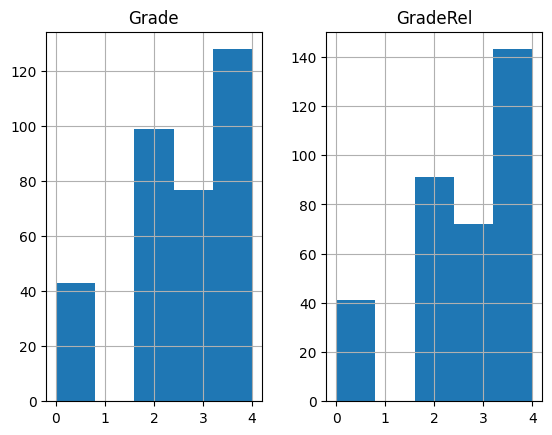

In [10]:
## Distribution
histData = grades[['SID','Grade','GradeRel']]
print(histData.describe())
print(histData.groupby(['Grade']).size())
print(histData.groupby(['GradeRel']).size())
hist = grades[['SID','Grade','GradeRel']].hist(bins=5)

In [11]:
# Understanding students with failing grade

print("Grades when HW grade and Test grade both failing")
failBecauseBoth = grades[['SID', 'MissingQuizzes', 'TestGrade', 'TestGradeRel', 'HWGrade', 'HWGradeRel']].loc[ (grades['HWGrade']==0) & (grades['TestGrade'] ==0)]
print(failBecauseBoth)

print("Grades when HW grade failing and Test grade passing")
failBecauseHW = grades[['SID', 'MissingQuizzes', 'TestGrade', 'TestGradeRel', 'HWGrade', 'HWGradeRel']].loc[ (grades['HWGrade']==0) & (grades['TestGrade'] > 0)]
print(failBecauseHW)

print("Grades when Test grade failing and HW grade passing")
failBecauseTest = grades[['SID', 'MissingQuizzes', 'TestGrade', 'TestGradeRel', 'HWGrade', 'HWGradeRel']].loc[ (grades['HWGrade']>0) & (grades['TestGrade'] == 0)]
print(failBecauseTest)
#print(failData.describe())
#print(histData.groupby(['Grade']).size())
#print(histData.groupby(['GradeRel']).size())
#hist = grades[['SID','Grade','GradeRel']].hist(bins=5)

Grades when HW grade and Test grade both failing
           SID  MissingQuizzes  TestGrade  TestGradeRel  HWGrade  HWGradeRel
5    A16956907              25          0             0        0           0
46   A17601239              12          0             0        0           0
48   A17018268              18          0             0        0           0
51   A16386606              24          0             0        0           2
105  A16774579              20          0             0        0           0
109  U10105892              15          0             0        0           0
147  A16890596              22          0             0        0           0
168  A16423909              26          0             0        0           0
173  A16763664              14          0             0        0           0
189  A17049158              23          0             0        0           0
196  A18100757              26          0             0        0           0
220  A17628981             

In [12]:
## Understanding thresholds

print(grades[(grades['Grade']<grades['GradeRel'])][['SID','Grade']].groupby(['Grade']).count())
print (grades[['SID','Grade','GradeRel','LetterGrade','LetterGradeRel']][
                           (grades['Grade']<grades['GradeRel'])])

       SID
Grade     
0        2
2       10
3       14
           SID  Grade  GradeRel LetterGrade LetterGradeRel
21   A16588164      2         3          C+             B+
31   A16272621      0         2           D             C+
36   A16912911      2         3          C+             B+
37   A18078406      0         2           D             C+
68   A18061636      3         4          B+             A+
74   A17239966      2         4          C+             A+
87   A17501322      3         4          B+              A
95   A17528781      3         4          B+             A+
103  A17358305      2         3          C+             B+
114  A16796036      2         3          C+             B+
126  A16913877      3         4          B+             A+
129  A16899990      2         3          C+             B+
148  A17438070      2         3          C+             B+
149  A17440736      3         4          B+             A+
195  A16955613      3         4          B+              A
2

In [13]:
## Audit
auditKeys = [31, 37, 95, 74, 165, 182, 0, 2, 100, 16, 80, 243, 281, 284, 64, 236]
auditKey = 1
print(grades.loc[[auditKey]][['SID', 'Last Name', 'MissingQuizzes', 'TestGrade', 'TestGradeRel', 'HWGrade', 'HWGradeRel', 'Grade', 'GradeRel', 'LetterGrade', 'LetterGradeRel']].transpose())
print(grades.loc[[auditKey]][['HW1grade','HW2grade','HW3grade','HW4grade','HW5grade','Projectgrade','Inclass1grade','Inclass2grade','Final1grade','Final2grade']].transpose())
#print(grades.loc[[auditKey]][['HW1gradeRel','HW2gradeRel','HW3gradeRel','HW4gradeRel','HW5gradeRel','ProjectgradeRel','Inclass1gradeRel','Inclass2gradeRel','Final1gradeRel','Final2gradeRel']].transpose())
print(grades.loc[[auditKey]][['HW1','HW2','HW3','HW4','HW5','Project','Inclass1','Inclass2','Final1','Final2']].transpose())

                        1
SID             A17376822
Last Name        Arellano
MissingQuizzes          4
TestGrade               4
TestGradeRel            4
HWGrade                 4
HWGradeRel              4
Grade                   4
GradeRel                4
LetterGrade             A
LetterGradeRel          A
               1
HW1grade       3
HW2grade       3
HW3grade       3
HW4grade       3
HW5grade       0
Projectgrade   4
Inclass1grade  3
Inclass2grade  2
Final1grade    4
Final2grade    3
              1
HW1        41.0
HW2        34.0
HW3        44.0
HW4        42.0
HW5         0.0
Project   100.0
Inclass1   30.0
Inclass2   25.0
Final1     42.0
Final2     37.0


In [14]:
grades.to_csv("CSE105W24.grades.csv")